# Functional preference profiles

In this final part, we'll take advantage of Neurosynth's semantic meta-data to generate a psychological profile for each cluster.  

For each region in the clustering analysis, we're going to determine how well we can classify studies that activated the region, versus those that did not, on the basis of latent topics describing the psychological states in each study.

Using the RegionalClassifier class included in this repo, we can perform this analysis on any given clustering image. I've also included some functons to easily make polar plots to visualize which topics were most strongly associated with any given region

In [1]:
%matplotlib inline
# Load a neurosynth dataset. If you generate your own dataset, you can try this with fewer or greater number of topics
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("data/neurosynth_60_0.6.pkl")

In [2]:
from sklearn.naive_bayes import GaussianNB
from classification import RegionalClassifier
from sklearn.metrics import roc_auc_score

We used Gaussian naive Bayes for classificaiton, and extract log odds ratios for each topic for each region to estimate how strongly each psychological state indicated that a given region was active. Note: If you wish to use a different classifier, you must specify a importance_function to extract the appropriate values from the classifiers, as these vary for each algorithm.

In [3]:
# Instantiate a RegionalClassifier for your image and classify
clf = RegionalClassifier(dataset, 'images/lfc_70.nii.gz', GaussianNB())
clf.classify(scoring=roc_auc_score)

Classifying...


/Users/alejandro/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/alejandro/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[##########] 100%


We can take a look at various aspects of the classification performance such as the classification performance for each region (in this case ROC area under the curve):

In [4]:
clf.class_score

array([ 0.61098639,  0.65344555,  0.559327  ,  0.554091  ,  0.58110431,
        0.5576475 ,  0.60869061,  0.56143162,  0.62709574,  0.56505493,
        0.60993137,  0.56916043,  0.57084022,  0.62706463])

## Visualization with polar plots

I've included a listing of the topics used in the manuscript, and a set of "nicknames" that I used throughout the manuscript for each topic. This bit of code extracts the nickname (i.e. topic_name) I gave to each topic to help with visualization. You may also use "top_2" to label each topic with the two strongest loading words.

In [5]:
import pandas as pd
## Topic nicknames
nicknames = pd.read_csv('data/v4-topics-60.txt', delimiter='\t')
nicknames['topic_name'] = nicknames.apply(lambda row: '_'.join([str(row.topic_number)] + row.top_words.split(' ')[0:3]), axis=1)
nicknames = nicknames.sort_values('topic_name')

To recreate the plots from the publication, we simply extract a pandas formatted table of importances that represent how strongly each topic indicated each region would be active in a study (in this case log odds ratios) using clf.get_formatted_importances, ensuring to provide the topic nicknames from above.
Then, we feed this pandas table into plot_clf_polar, which returns a nice polar plot for each prespecified topic.

In [6]:
from plotting import plot_clf_polar

selected_topics = ['pain', 'reward', 'memory', 'emotion', 'mentalizing', 'inhibition', 'novelty', 
                   'switching', 'conflict', 'WM', 'semantics', 'speech', 'attention', 'action', 'motor', 'gaze']

In [7]:
# Here I define the groupings of the regions for future analyses
rostral_FPN = [3, 4, 5]
mid_FPN = [6, 7, 8, 9]
caudal_FPN = [10, 11]
default = [12, 13, 14]
motor = [1, 2]

# And load custom colors
from colors import l_70_colors

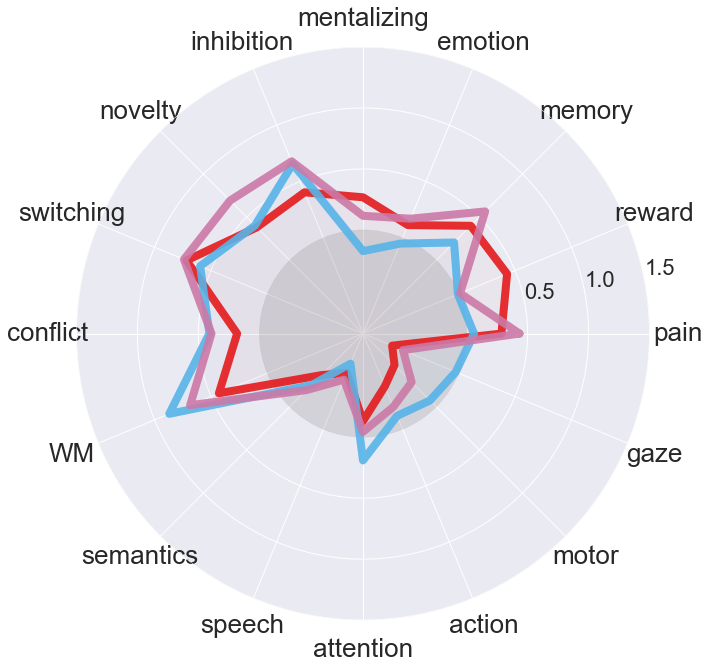

In [8]:
formated_importances = clf.get_formatted_importances(feature_names=nicknames.nickname)
_ = plot_clf_polar(formated_importances, 
                   labels = selected_topics, mask=rostral_FPN, max_val=1.5, palette = l_70_colors)

We can also ask plot_clf_polar to choose some topics for us. In this case, we're asking for the 4 topics that load most strongly for each region, and specifiying that these topics are reordered to ensure a nice looking visualization. Under the hood, this function uses hierarchical clustering to reorder the topics. See the docstring of plot_polar for many more ways to choose topics and automatically order the features.

Note that I changed the min value here for more differetial plotting, as these four topics all load strongly to these particular regions.

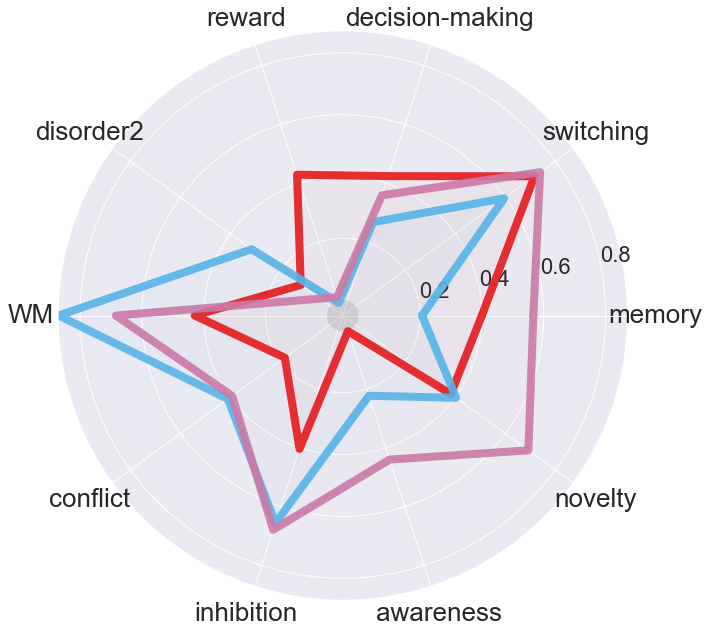

In [65]:
topics = plot_clf_polar(formated_importances, 
                   n_top=6, reorder=True, mask=rostral_FPN, palette = l_70_colors, min_val=-0.05)

plot_clf_polar also returns the topics it selected as a list, and the data that went into the visualization (for debugging)

In [53]:
topics

(['memory',
  'switching',
  'decision-making',
  'reward',
  'disorder2',
  'WM',
  'conflict',
  'inhibition',
  'awareness',
  'novelty'],
 region                  3         4         5
 feature                                      
 memory           0.399847  0.206154  0.566387
 switching        0.716545  0.595222  0.738927
 decision-making  0.424271  0.267794  0.359184
 reward           0.429034 -0.007388  0.011973
 disorder2        0.118232  0.314952  0.042770
 WM               0.429099  0.869324  0.684258
 conflict         0.182020  0.409559  0.392584
 inhibition       0.403725  0.656103  0.678886
 awareness        0.003015  0.222968  0.440074
 novelty          0.381784  0.402785  0.691986)

Below are the rest of the polar plots from the article

### Fronto-parietal network

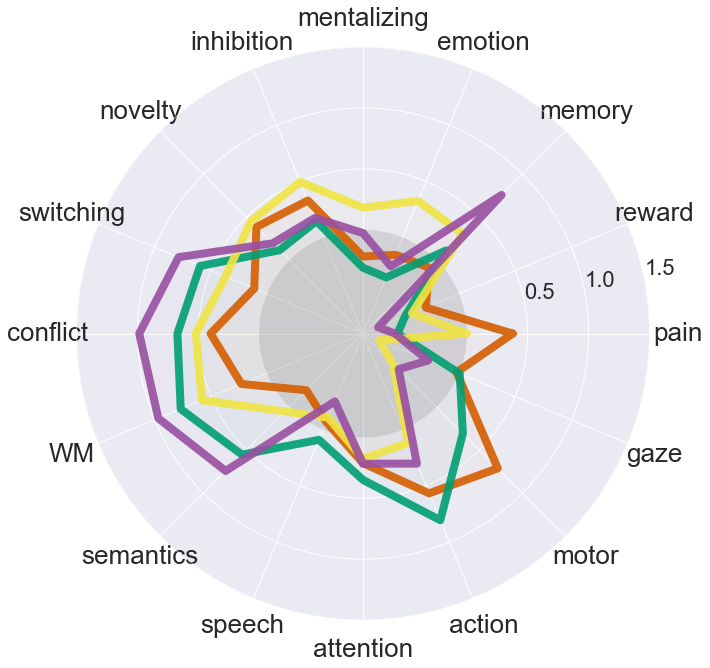

In [54]:
_ = plot_clf_polar(formated_importances, 
                   labels = selected_topics, mask=mid_FPN, max_val=1.5, palette = l_70_colors)

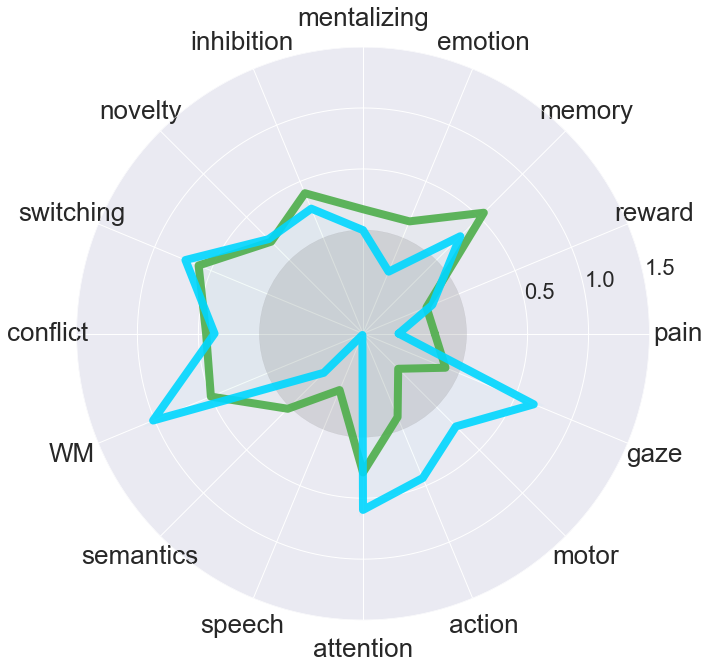

In [55]:
_ = plot_clf_polar(formated_importances, 
                   labels = selected_topics, mask=caudal_FPN, max_val=1.5, palette = l_70_colors)

### Default network

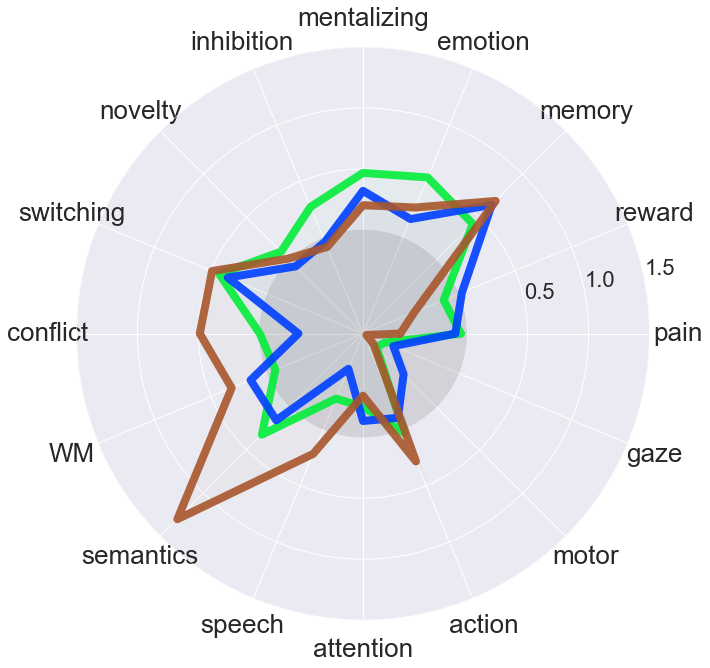

In [57]:
_ = plot_clf_polar(formated_importances, 
                   labels = selected_topics, mask=default, max_val=1.5, palette = l_70_colors)

### Sensori-motor network

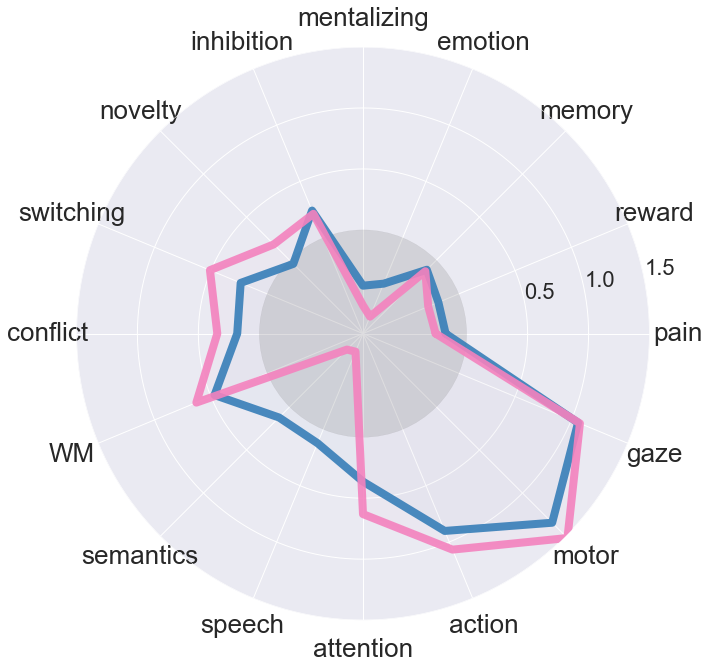

In [59]:
_ = plot_clf_polar(formated_importances, 
                   labels = selected_topics, mask=motor, max_val=1.5, palette = l_70_colors)

# Estimating uncertainty

## Permutation tests

In [34]:
%load_ext autoreload
%autoreload 1
%aimport classification

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, using `permute_log_odds_ratio` we perform a permutation test for each region - topic log odds ratio, resulting in the z-score and p-value of the observed log odds ratio in permuted null distribution. Small p-values indicate it is inprobably we would observe the given log odds ratio under the null distribution. 

Note that this function takes a fitted RegionalClassifier model (that we generated above) and the number of times to resample as required arguments

In [79]:
# These are the names of each region given the manuscript
names_70 = ['PMv', 'PMd', '10v', '9/46dr', '10d', '44 [R]', 'IFJ', 'IFG [R]', '9/46v', 
            '9/46dc', '6/8', '47/12', '9', '45 [L]']

In [120]:
from classification import permute_log_odds
lor_z = classification.permute_log_odds(clf, 100, feature_names=nicknames.nickname, region_names = names_70)

[##########] 100%


Next, we must adjust the p-values for multiple comparisons. To do so, we will use False Discovery Rate, and focus only on a subject of tests. As such, I'm only going to include the topics that we focused on for the above plots

In [121]:
select_ps = lor_z[lor_z.nickname.isin(selected_topics)]

Finally, we use `multipletests` from the stats models package to correct our p-values given an alpha of 0.01. We then consider the null hypothesis rejected if the adjusted p-value is less than 0.05 and the sign is positive (excluding less easily interpreted negative associations)

In [122]:
from statsmodels.sandbox.stats.multicomp import multipletests

reject, p_corr, a, a1 = multipletests(select_ps.p, alpha=0.01, method='fdr_tsbky')

select_ps['reject_01'] = reject & (select_ps.lor_z > 0) # Was the null hypothesis rejected?
select_ps['p_corr_01'] = p_corr # Adjusted p-value

The resulting table includes the FDR corrected p-value for each region / topic combination, and if the null hypothesis has been rejected

In [123]:
select_ps.head()

,ROI,nickname,lor_z,p,reject_01,p_corr_01
0,PMv,mentalizing,-5.264512,1.405624e-07,False,4.751891e-07
1,PMd,mentalizing,-6.350854,2.141232e-10,False,1.268096e-09
2,10v,mentalizing,2.592834,9.518871e-03,False,1.159078e-02
3,9/46dr,mentalizing,-1.591496,1.114979e-01,False,9.681415e-02
4,10d,mentalizing,1.036886,2.997891e-01,False,2.213434e-01


## Bootstrapped log odds ratios

Finally, another form of determining the uncertainty in our observations is to calculate bootstrapped confidence intervals for our estimates of the log odds ratio for each topic for each region. 

We can do so using the function `bootstrap_log_odds`. Note I'm passing in the names of each region so they are labeled in the resulting dataframe. 

In [124]:
lor_ci = classification.bootstrap_log_odds(clf, 100, feature_names=nicknames.nickname, 
                                           region_names = names_70, n_jobs=7)

[##########] 100%


The resulting data frame contains the low and high bounds for the 95% CI of the log odds ratio between each region and each topic

In [125]:
lor_ci.head()

,region,topic_name,hi_ci,low_ci,mean
0,10d,WM,0.226577,-0.187124,0.043561
1,10d,action,0.262433,-0.399687,-0.030157
2,10d,adhd,-0.137056,-0.395972,-0.243232
3,10d,arithmetic,0.509528,0.110540,0.338667
4,10d,attention,-0.143979,-1.687595,-0.624818


Finally, we can plot this as a line plot. Here I'm going to use ggplot to generate two plots, each display 8 of the topics we selected in earalier analyses. 

In [126]:
from matplotlib.colors import rgb2hex
%load_ext rpy2.ipython

subset_plot = lor_ci[(lor_ci.topic_name.isin(selected_topics))]
colors_hex = [rgb2hex(c) for c in l_70_colors]
colors_hex, _ = zip(*sorted(zip(colors_hex, names_70), key=lambda tup: tup[1]))
colors_hex = list(colors_hex)

names = list(reversed(names_70))

s1 = selected_topics[0:8]
s2 = selected_topics[8:]

%Rpush subset_plot
%Rpush colors_hex
%Rpush names
%Rpush s2
%Rpush s1

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


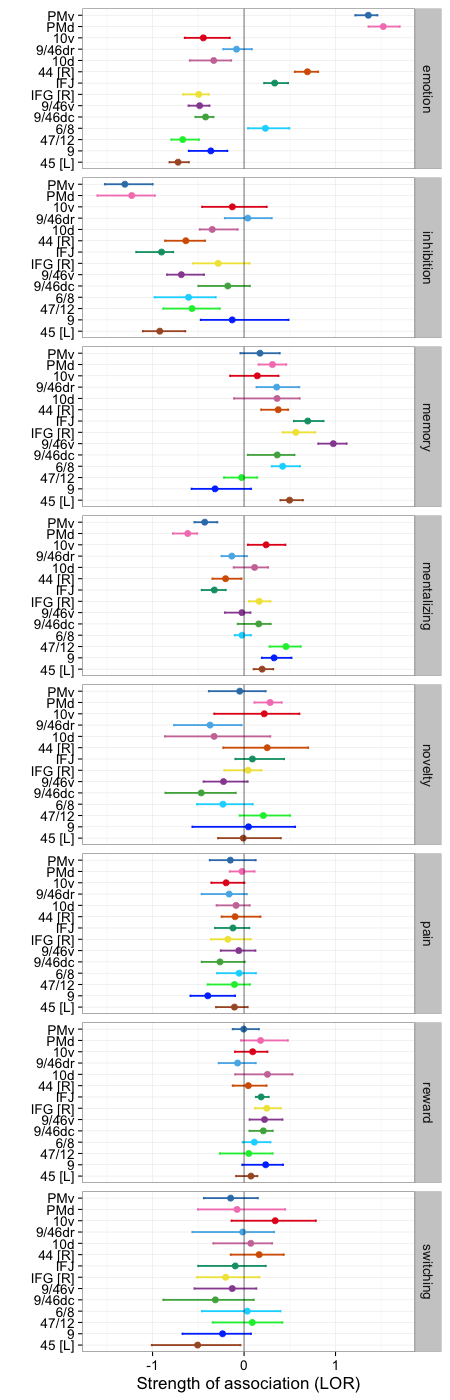

In [127]:
%%R -w 450 -h 1400 
library(ggplot2)
ggplot(subset(subset_plot, topic_name %in% s1), aes(mean, region, color=factor(region))) + geom_point(size=2.5) + 
geom_errorbarh(aes(xmin=low_ci, xmax=hi_ci), height=.2, size=.85) + geom_vline(xintercept = 0, alpha=.5) + facet_grid(topic_name~.) +
theme_bw(base_size = 17) +  theme(legend.position="none") + labs(x = 'Strength of association (LOR)', y="") +
scale_color_manual(values = colors_hex) + scale_y_discrete(limits=names)    

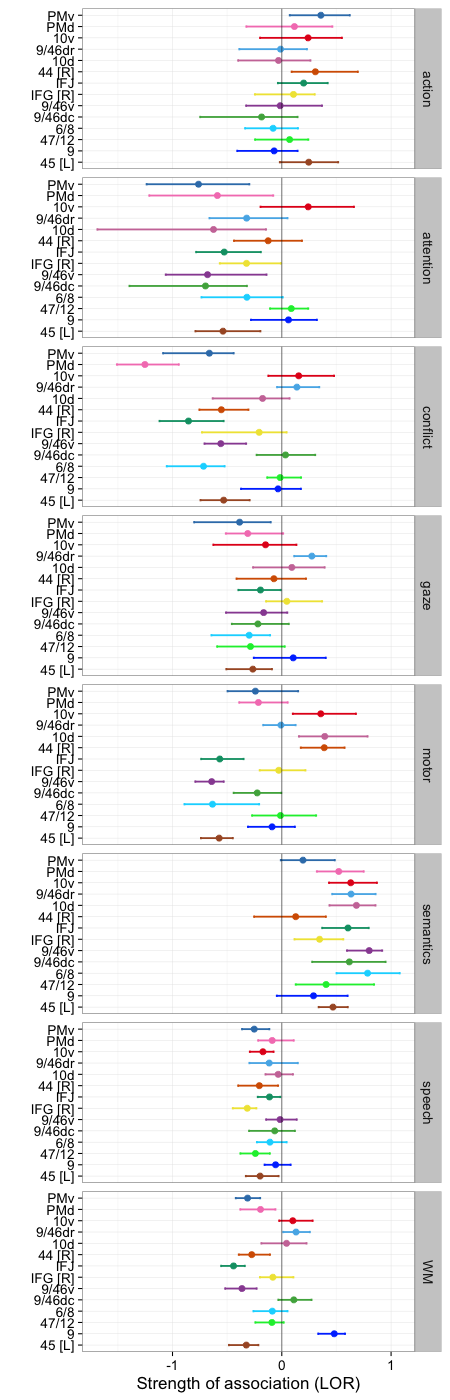

In [128]:
%%R -w 450 -h 1400 
library(ggplot2)
ggplot(subset(subset_plot, topic_name %in% s2), aes(mean, region, color=factor(region))) + geom_point(size=2.5) + 
geom_errorbarh(aes(xmin=low_ci, xmax=hi_ci), height=.2, size=.85) + geom_vline(xintercept = 0, alpha=.5) + facet_grid(topic_name~.) +
theme_bw(base_size = 17) +  theme(legend.position="none") + labs(x = 'Strength of association (LOR)', y="") +
scale_color_manual(values = colors_hex) + scale_y_discrete(limits=names)